In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [15]:
cab_data = pd.read_csv('Cab_Data.csv')
city = pd.read_csv('City.csv')
customer_id = pd.read_csv('Customer_ID.csv')
transaction_id = pd.read_csv('Transaction_ID.csv')

In [16]:
print("cab_data original shape:", cab_data.shape)
cab_data.drop_duplicates()
print("cab_data (after removing duplicates) shape:", cab_data.shape)
cab_data.dropna()
print("cab_data (after removing NA) shape:", cab_data.shape)

print("city original shape:", city.shape)
city.drop_duplicates()
print("city (after removing duplicates) shape:", city.shape)
city.dropna()
print("city (after removing NA) shape:", city.shape)

print("customer_id original shape:", customer_id.shape)
customer_id.drop_duplicates()
print("customer_id (after removing duplicates) shape:", customer_id.shape)
customer_id.dropna()
print("customer_id (after removing NA) shape:", customer_id.shape)

print("transaction_id original shape:", transaction_id.shape)
transaction_id.drop_duplicates()
print("transaction_id (after removing duplicates) shape:", transaction_id.shape)
transaction_id.dropna()
print("transaction_id (after removing NA) shape:", transaction_id.shape)
# Conclusion: No duplicate rows and NA values -> shape of all dataframes remained the same

cab_data original shape: (359392, 7)
cab_data (after removing duplicates) shape: (359392, 7)
cab_data (after removing NA) shape: (359392, 7)
city original shape: (20, 3)
city (after removing duplicates) shape: (20, 3)
city (after removing NA) shape: (20, 3)
customer_id original shape: (49171, 4)
customer_id (after removing duplicates) shape: (49171, 4)
customer_id (after removing NA) shape: (49171, 4)
transaction_id original shape: (440098, 3)
transaction_id (after removing duplicates) shape: (440098, 3)
transaction_id (after removing NA) shape: (440098, 3)


In [17]:
# Merging all datasets together based on foreign keys
master_data = (transaction_id.merge(cab_data, how= 'inner')).merge(customer_id, how='inner').merge(city, how= 'inner')

# Inserted new column of profits made with one transaction
master_data.insert(loc=9,
          column='Profit',
          value=master_data['Price Charged'] - master_data['Cost of Trip'])

# Inserted price of per KM of travel
master_data.insert(loc=6,
          column='Price per KM',
          value=master_data['Price Charged'] / master_data['KM Travelled'])

# Inserted price of per KM of travel
master_data.insert(loc=7,
          column='Profit per KM',
          value=master_data['Profit'] / master_data['KM Travelled'])

index = 0
for date in master_data['Date of Travel']:
    days_since_2016 = date - 42364
    if days_since_2016 >= 0 and days_since_2016 <= 335:
        master_data.at[index, 'Year'] = 2016
    elif days_since_2016 <= 700:
        master_data.at[index, 'Year'] = 2017
    else:
        master_data.at[index, 'Year'] = 2018
    index = index + 1
    
rides_count = master_data['Customer ID'].value_counts().rename_axis('Customer ID').reset_index(name='Number of Rides')
master_data = pd.merge(master_data, rides_count, on='Customer ID')

master_data

,Transaction ID,Customer ID,Payment_Mode,Date of Travel,Company,City,Price per KM,Profit per KM,KM Travelled,Price Charged,Cost of Trip,Profit,Gender,Age,Income (USD/Month),Population,Users,Year,Number of Rides
0,10000011,29290,Card,42377,Pink Cab,ATLANTA GA,12.182266,1.882266,30.45,370.95,313.6350,57.3150,Male,28,10813,"814,885","24,701",2016.0,3
1,10351127,29290,Cash,43302,Yellow Cab,ATLANTA GA,22.859870,10.739870,26.19,598.70,317.4228,281.2772,Male,28,10813,"814,885","24,701",2018.0,3
2,10412921,29290,Card,43427,Yellow Cab,ATLANTA GA,18.614571,4.574571,42.55,792.05,597.4020,194.6480,Male,28,10813,"814,885","24,701",2018.0,3
3,10000012,27703,Card,42375,Pink Cab,ATLANTA GA,12.526904,0.826904,28.62,358.52,334.8540,23.6660,Male,27,9237,"814,885","24,701",2016.0,4
4,10320494,27703,Card,43211,Yellow Cab,ATLANTA GA,19.821330,6.981330,36.38,721.10,467.1192,253.9808,Male,27,9237,"814,885","24,701",2018.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359387,10307228,51406,Cash,43162,Yellow Cab,WASHINGTON DC,17.420052,3.740052,38.40,668.93,525.3120,143.6180,Female,29,6829,"418,859","127,001",2018.0,6
359388,10319775,51406,Cash,43203,Yellow Cab,WASHINGTON DC,18.935574,6.455574,3.57,67.60,44.5536,23.0464,Female,29,6829,"418,859","127,001",2018.0,6
359389,10347676,51406,Card,43287,Yellow Cab,WASHINGTON DC,14.150469,-0.249531,23.46,331.97,337.8240,-5.8540,Female,29,6829,"418,859","127,001",2018.0,6
359390,10358624,51406,Cash,43314,Yellow Cab,WASHINGTON DC,12.979348,-0.220652,27.60,358.23,364.3200,-6.0900,Female,29,6829,"418,859","127,001",2018.0,6


In [18]:
print("Pink Cab Rows:", len(master_data[master_data["Company"]=="Pink Cab"]))
print("Yellow Cab Rows:",len(master_data[master_data["Company"]=="Yellow Cab"]))
print("Yellow Cab has", 274681/84711, "times as many rows as Pink Cab")
# Conclusion: Yellow Cab dataset is much more represented than Pink Cab Dataset

Pink Cab Rows: 84711
Yellow Cab Rows: 274681
Yellow Cab has 3.2425659005323983 times as many rows as Pink Cab


In [19]:
print("Average age of Pink Cab Customers:", master_data.loc[master_data['Company'] == 'Pink Cab', 'Age'].mean())
print("Average age of Yellow Cab Customers:", master_data.loc[master_data['Company'] == 'Yellow Cab', 'Age'].mean())
# Conclusion: Essentially the same average ages (almost identical)

Average age of Pink Cab Customers: 35.322413854162974
Average age of Yellow Cab Customers: 35.34111205361856


In [20]:
print("Average income of Pink Cab Customers:", master_data.loc[master_data['Company'] == 'Pink Cab', 'Income (USD/Month)'].mean())
print("Average income of Yellow Cab Customers:", master_data.loc[master_data['Company'] == 'Yellow Cab', 'Income (USD/Month)'].mean())
# Conclusion: Essentially the same average incomes (almost identical)

Average income of Pink Cab Customers: 15059.04713673549
Average income of Yellow Cab Customers: 15045.669816987705


In [21]:
print("Average Profit of Pink Cab Customers:", master_data.loc[master_data['Company'] == 'Pink Cab', 'Profit'].mean())
print("Average Profit of Yellow Cab Customers:", master_data.loc[master_data['Company'] == 'Yellow Cab', 'Profit'].mean())
# Conclusion: Profit margins for Yellow Cabs are much higher

Average Profit of Pink Cab Customers: 62.65217410961977
Average Profit of Yellow Cab Customers: 160.25998584103021


In [22]:
print("Average Price per KM of Pink Cab Customers:", master_data.loc[master_data['Company'] == 'Pink Cab', 'Price per KM'].mean())
print("Average Price per KM of Yellow Cab Customers:", master_data.loc[master_data['Company'] == 'Yellow Cab', 'Price per KM'].mean())

Average Price per KM of Pink Cab Customers: 13.768510007062726
Average Price per KM of Yellow Cab Customers: 20.306072681788127


In [23]:
print("Average Profit per KM of Pink Cab Customers:", 
      master_data.loc[master_data['Company'] == 'Pink Cab', 'Profit per KM'].mean())
print("Average Profit per KM of Yellow Cab Customers:", 
      master_data.loc[master_data['Company'] == 'Yellow Cab', 'Profit per KM'].mean())

Average Profit per KM of Pink Cab Customers: 2.769907700396534
Average Profit per KM of Yellow Cab Customers: 7.105507808353114


Pink Cab average profit made per Transaction 2016: 62.78542221058146
Pink Cab average profit made per Transaction 2017: 67.44435470475032
Pink Cab average profit made per Transaction 2018: 58.40679605784178


Yellow Cab average profit made per Transaction 2016: 171.3991760641048
Yellow Cab average profit made per Transaction 2017: 171.13147693265412
Yellow Cab average profit made per Transaction 2018: 143.47844697502347


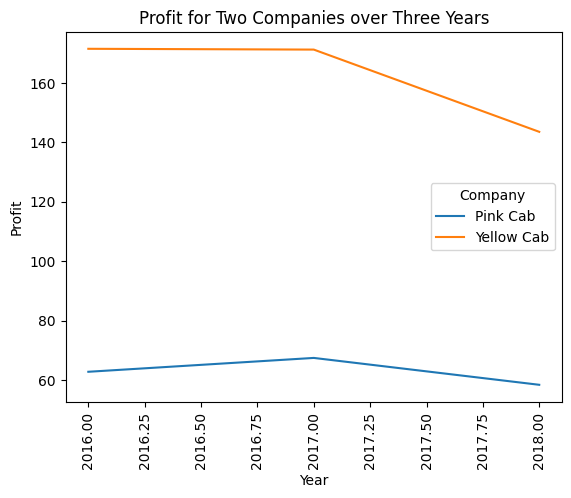

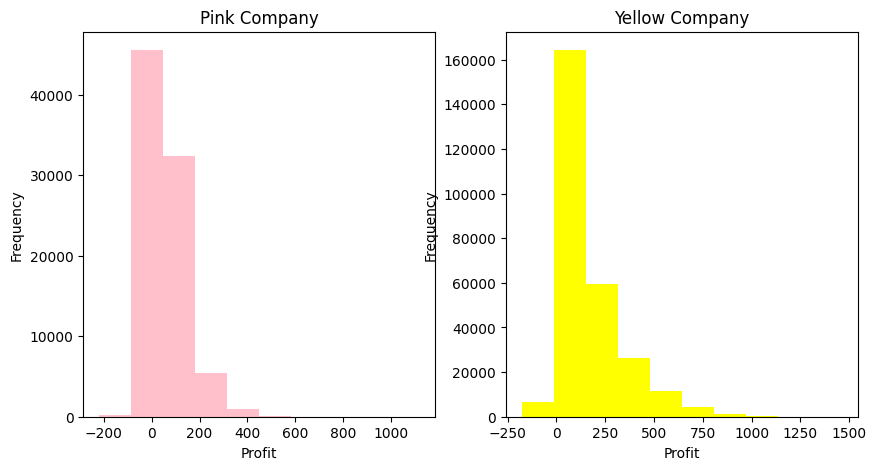

In [41]:
selected_rows = master_data.loc[(master_data['Company'] == 'Pink Cab') & 
                                (master_data['Year'] == 2016)]

pink_2016 = selected_rows['Profit'].mean()
print("Pink Cab average profit made per Transaction 2016:", pink_2016)

selected_rows = master_data.loc[(master_data['Company'] == 'Pink Cab') & 
                                (master_data['Year'] == 2017)]

pink_2017 = selected_rows['Profit'].mean()
print("Pink Cab average profit made per Transaction 2017:", pink_2017)

selected_rows = master_data.loc[(master_data['Company'] == 'Pink Cab') & 
                                (master_data['Year'] == 2018)]

pink_2018 = selected_rows['Profit'].mean()
print("Pink Cab average profit made per Transaction 2018:", pink_2018)
print('\n')

selected_rows = master_data.loc[(master_data['Company'] == 'Yellow Cab') & 
                                (master_data['Year'] == 2016)]

yellow_2016 = selected_rows['Profit'].mean()
print("Yellow Cab average profit made per Transaction 2016:", yellow_2016)

selected_rows = master_data.loc[(master_data['Company'] == 'Yellow Cab') & 
                                (master_data['Year'] == 2017)]

yellow_2017 = selected_rows['Profit'].mean()
print("Yellow Cab average profit made per Transaction 2017:", yellow_2017)

selected_rows = master_data.loc[(master_data['Company'] == 'Yellow Cab') & 
                                (master_data['Year'] == 2018)]

yellow_2018 = selected_rows['Profit'].mean()
print("Yellow Cab average profit made per Transaction 2018:", yellow_2018)

profit_data = pd.DataFrame({
    'Year': [2016, 2017, 2018, 2016, 2017, 2018],
    'Company': ['Pink Cab', 'Pink Cab', 'Pink Cab', 'Yellow Cab', 'Yellow Cab', 'Yellow Cab'],
    'Profit': [pink_2016, pink_2017, pink_2018, yellow_2016, yellow_2017, yellow_2018]
})

pivot_table = pd.pivot_table(profit_data, values='Profit', index='Year', columns='Company')

# Plotting the pivot table as a line graph
pivot_table.plot(kind='line')
plt.xlabel('Year')
plt.ylabel('Profit')
plt.title('Profit for Two Companies over Three Years')
plt.xticks(rotation=90)
plt.show()

pink_data = master_data[master_data['Company'] == 'Pink Cab']
yellow_data = master_data[master_data['Company'] == 'Yellow Cab']

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10, 5))
ax1.hist(pink_data['Profit'], bins=10, color='pink')
ax1.set_title('Pink Company')
ax1.set_xlabel('Profit')
ax1.set_ylabel('Frequency')

ax2.hist(yellow_data['Profit'], bins=10, color='yellow')
ax2.set_title('Yellow Company')
ax2.set_xlabel('Profit')
ax2.set_ylabel('Frequency')

plt.show()
# Conclusion: This shows that the most frequent profit margins per transaction for pink company hovers around 0
# Conslusion: This shows that the most frequent profit margins for transaction company covers around > 0

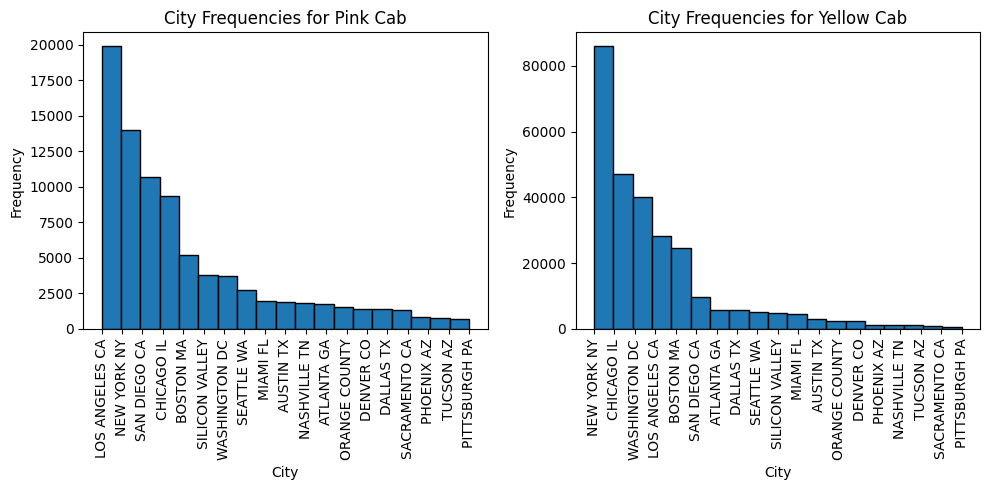

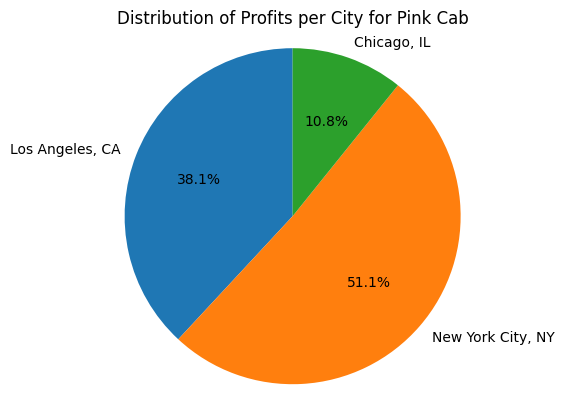

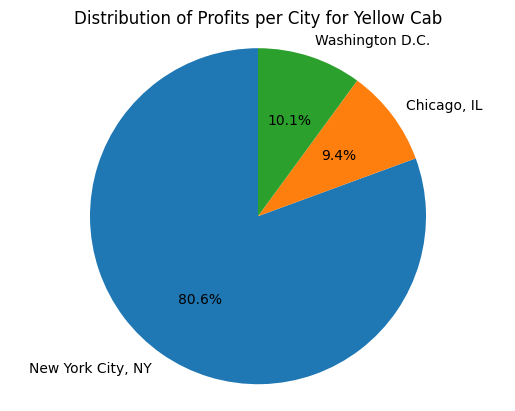

In [37]:
# Hypothesis: There will be a difference in location frequencies between the companies that contribute to profits
# Motivation: More urban locations are more likely to use cab services, this will contribute to most of the profits
# Sub-Question 1: Will the ditribution of the location frequencies be different between the two companies?
# Sub-Question 2: What other noise in the data that is not accounted for?
# Sub-Quesiton 3: What percent of the total profits came from urban locations for both companies?

fig, axs = plt.subplots(1, 2, figsize=(10, 5))

for i, company in enumerate(master_data['Company'].unique()):
    city_counts = master_data.loc[master_data['Company'] == company, 'City'].value_counts()
    axs[i].hist(city_counts.index, weights=city_counts.values, bins=len(city_counts), edgecolor='black')
    axs[i].set_title(f'City Frequencies for {company}')
    axs[i].set_xlabel('City')
    axs[i].set_ylabel('Frequency')
    axs[i].tick_params(axis='x', rotation=90)

plt.tight_layout()
plt.show()

pink_LA = master_data.loc[(master_data['Company'] == 'Pink Cab') 
                                        & (master_data['City'] == 'LOS ANGELES CA'), 'Profit'].sum()

pink_NYC = master_data.loc[(master_data['Company'] == 'Pink Cab') 
                                        & (master_data['City'] == 'NEW YORK NY'), 'Profit'].sum()

pink_SD = master_data.loc[(master_data['Company'] == 'Pink Cab') 
                                        & (master_data['City'] == 'SAN DIEDO CA'), 'Profit'].sum()

pink_data = [pink_LA, pink_NYC, pink_CHI]
pink_labels = ['Los Angeles, CA', 'New York City, NY', 'Chicago, IL']
plt.figure()
plt.pie(pink_data, labels=pink_labels, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Profits per City for Pink Cab')
plt.axis('equal')

plt.show()


yellow_NYC = master_data.loc[(master_data['Company'] == 'Yellow Cab') 
                                        & (master_data['City'] == 'NEW YORK NY'), 'Profit'].sum()

yellow_CHI = master_data.loc[(master_data['Company'] == 'Yellow Cab') 
                                        & (master_data['City'] == 'CHICAGO IL'), 'Profit'].sum()

yellow_DC = master_data.loc[(master_data['Company'] == 'Yellow Cab') 
                                        & (master_data['City'] == 'WASHINGTON DC'), 'Profit'].sum()

yellow_data = [yellow_NYC, yellow_CHI, yellow_DC]
yellow_labels = ['New York City, NY', 'Chicago, IL', 'Washington D.C.']
plt.figure()
plt.pie(yellow_data, labels=yellow_labels, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Profits per City for Yellow Cab')
plt.axis('equal')

plt.show()

# Conclusion: Yellow Cab is very top-heavy, as New York City contributed to 80% of their profits
# Conlusion: Pink Cab is more equal among its top three cities compared to Yellow Cab


Pink Cab Number of Young Adults: 18568
Pink Cab Number of Middle Adults: 9972
Pink Cab Number of Older Adults: 3458
Pink Cab Number of Elderly: 332
Yellow Cab Number of Young Adults: 22960
Yellow Cab Number of Middle Adults: 12324
Yellow Cab Number of Older Adults: 4221
Yellow Cab Number of Elderly: 391


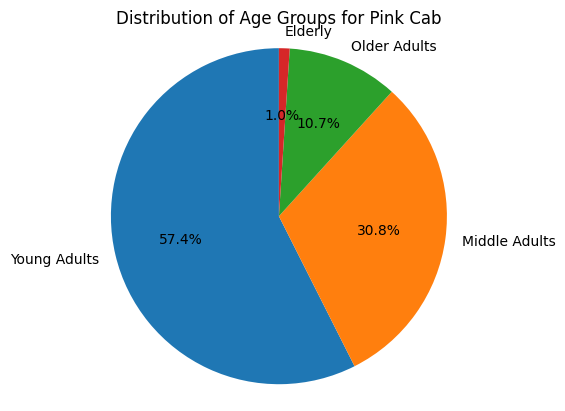

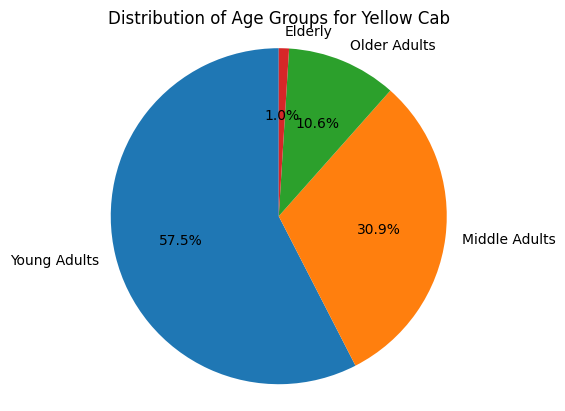

(-1.0999988812321313,
 1.0999992692924283,
 -1.0999999957454365,
 1.0999999997974017)

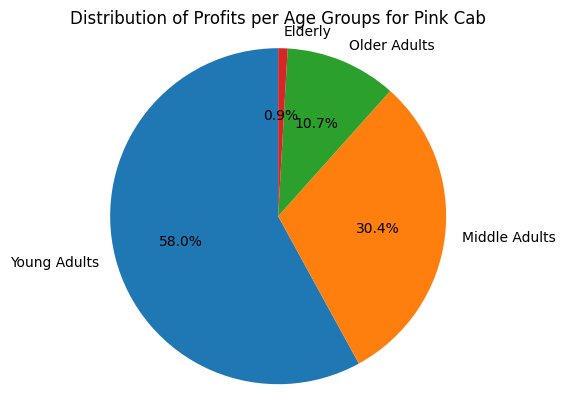

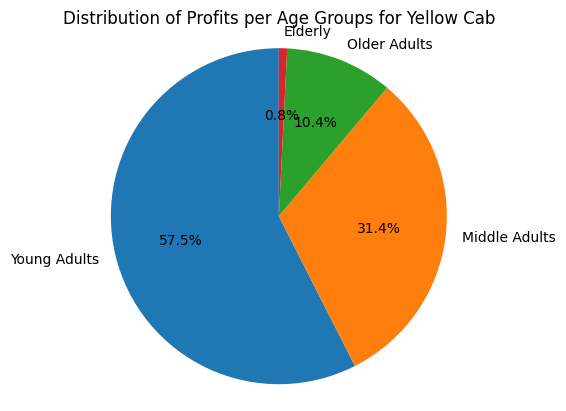

In [26]:
# Hypothesis: There will be a difference in age groups between the companies that contribute to profits
# Motivation: Younger people are more likely to use cab services, this will contribute to most of the profits
# Sub-Question 1: Will the ditribution of the age groups be different between the two companies?
# Sub-Question 2: What other noise in the data that is not accounted for?
# Sub-Quesiton 3: What percent of the total profits came from young adults for both companies?

# Identifying age groups
pink_cab_young_adults = master_data.loc[(master_data['Company'] == 'Pink Cab') & (master_data['Age'] >= 18) & (master_data['Age'] <= 35), 'Customer ID'].nunique()
pink_cab_middle_adults = master_data.loc[(master_data['Company'] == 'Pink Cab') & (master_data['Age'] >= 36) & (master_data['Age'] <= 54), 'Customer ID'].nunique()
pink_cab_older_adults = master_data.loc[(master_data['Company'] == 'Pink Cab') & (master_data['Age'] >= 55) & (master_data['Age'] <= 64), 'Customer ID'].nunique()
pink_cab_elderly = master_data.loc[(master_data['Company'] == 'Pink Cab') & (master_data['Age'] >= 65), 'Customer ID'].nunique()
print("Pink Cab Number of Young Adults:", pink_cab_young_adults)
print("Pink Cab Number of Middle Adults:", pink_cab_middle_adults)
print("Pink Cab Number of Older Adults:", pink_cab_older_adults)
print("Pink Cab Number of Elderly:", pink_cab_elderly)

yellow_cab_young_adults = master_data.loc[(master_data['Company'] == 'Yellow Cab') & (master_data['Age'] >= 18) & (master_data['Age'] <= 35), 'Customer ID'].nunique()
yellow_cab_middle_adults = master_data.loc[(master_data['Company'] == 'Yellow Cab') & (master_data['Age'] >= 36) & (master_data['Age'] <= 54), 'Customer ID'].nunique()
yellow_cab_older_adults = master_data.loc[(master_data['Company'] == 'Yellow Cab') & (master_data['Age'] >= 55) & (master_data['Age'] <= 64), 'Customer ID'].nunique()
yellow_cab_elderly = master_data.loc[(master_data['Company'] == 'Yellow Cab') & (master_data['Age'] >= 65), 'Customer ID'].nunique()
print("Yellow Cab Number of Young Adults:", yellow_cab_young_adults)
print("Yellow Cab Number of Middle Adults:", yellow_cab_middle_adults)
print("Yellow Cab Number of Older Adults:", yellow_cab_older_adults)
print("Yellow Cab Number of Elderly:", yellow_cab_elderly)

# Graphing age group distributions
pink_data = [pink_cab_young_adults, pink_cab_middle_adults, pink_cab_older_adults, pink_cab_elderly]
pink_labels = ['Young Adults', 'Middle Adults', 'Older Adults', 'Elderly']
plt.pie(pink_data, labels=pink_labels, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Age Groups for Pink Cab')
plt.axis('equal')

yellow_data = [yellow_cab_young_adults, yellow_cab_middle_adults, yellow_cab_older_adults, yellow_cab_elderly]
yellow_labels = ['Young Adults', 'Middle Adults', 'Older Adults', 'Elderly']
plt.figure()
plt.pie(yellow_data, labels=yellow_labels, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Age Groups for Yellow Cab')
plt.axis('equal')

plt.show()


# Profits per age group
pink_cab_young_adults = master_data.loc[(master_data['Company'] == 'Pink Cab') & (master_data['Age'] >= 18) & (master_data['Age'] <= 35), 'Profit'].sum()
pink_cab_middle_adults = master_data.loc[(master_data['Company'] == 'Pink Cab') & (master_data['Age'] >= 36) & (master_data['Age'] <= 54), 'Profit'].sum()
pink_cab_older_adults = master_data.loc[(master_data['Company'] == 'Pink Cab') & (master_data['Age'] >= 55) & (master_data['Age'] <= 64), 'Profit'].sum()
pink_cab_elderly = master_data.loc[(master_data['Company'] == 'Pink Cab') & (master_data['Age'] >= 65), 'Profit'].sum()

pink_data = [pink_cab_young_adults, pink_cab_middle_adults, pink_cab_older_adults, pink_cab_elderly]
pink_labels = ['Young Adults', 'Middle Adults', 'Older Adults', 'Elderly']
plt.pie(pink_data, labels=pink_labels, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Profits per Age Groups for Pink Cab')
plt.axis('equal')


yellow_cab_young_adults = master_data.loc[(master_data['Company'] == 'Yellow Cab') & (master_data['Age'] >= 18) & (master_data['Age'] <= 35), 'Profit'].sum()
yellow_cab_middle_adults = master_data.loc[(master_data['Company'] == 'Yellow Cab') & (master_data['Age'] >= 36) & (master_data['Age'] <= 54), 'Profit'].sum()
yellow_cab_older_adults = master_data.loc[(master_data['Company'] == 'Yellow Cab') & (master_data['Age'] >= 55) & (master_data['Age'] <= 64), 'Profit'].sum()
yellow_cab_elderly = master_data.loc[(master_data['Company'] == 'Yellow Cab') & (master_data['Age'] >= 65), 'Profit'].sum()

yellow_data = [yellow_cab_young_adults, yellow_cab_middle_adults, yellow_cab_older_adults, yellow_cab_elderly]
yellow_labels = ['Young Adults', 'Middle Adults', 'Older Adults', 'Elderly']
plt.figure()
plt.pie(yellow_data, labels=yellow_labels, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Profits per Age Groups for Yellow Cab')
plt.axis('equal')

# Conclusion - Both companies have relatively similar distribution of age groups
# Conclusion - Hypothesis was correct in that most of the users are young adults for both companies
# Conclusion - Intuively makes sense that the profit distribution is also majority of young adults

Pink Cab number of cash transactions: 33992
Pink Cab number of card transactions: 50719


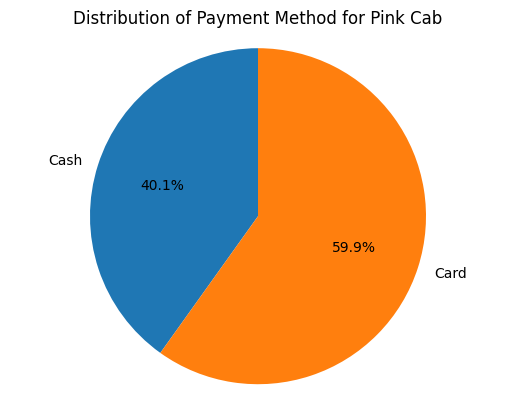

Yellow Cab number of cash transactions: 109896
Yellow Cab number of card transactions: 164785


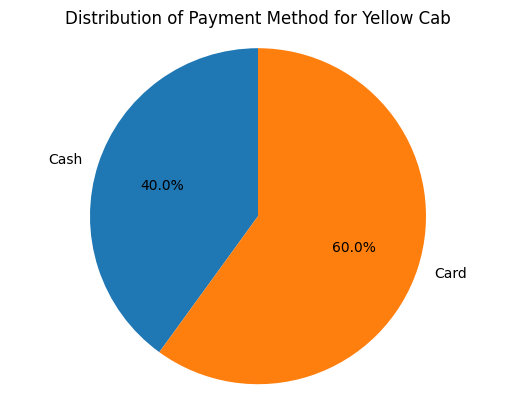

Pink average profit cash transaction: 62.565472228759695
Pink average profit card transaction: 62.71028192590548
Yellow average profit cash transaction: 160.6818743939725
Yellow average profit card transaction: 159.97862610310403


Pink number of card transactions in 2016: 12559
Pink number of card transactions in 2017: 17716
Pink number of card transactions in 2018: 20444
Pink number of cash transactions in 2016: 8440
Pink number of cash transactions in 2017: 11903
Pink number of cash transactions in 2018: 13649


Yellow number of card transactions in 2016: 41731
Yellow number of card transactions in 2017: 57711
Yellow number of card transactions in 2018: 65343
Yellow number of cash transactions in 2016: 27905
Yellow number of cash transactions in 2017: 38672
Yellow number of cash transactions in 2018: 43319




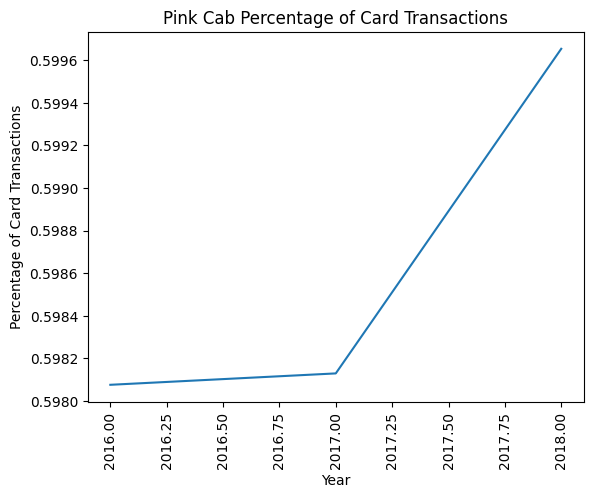

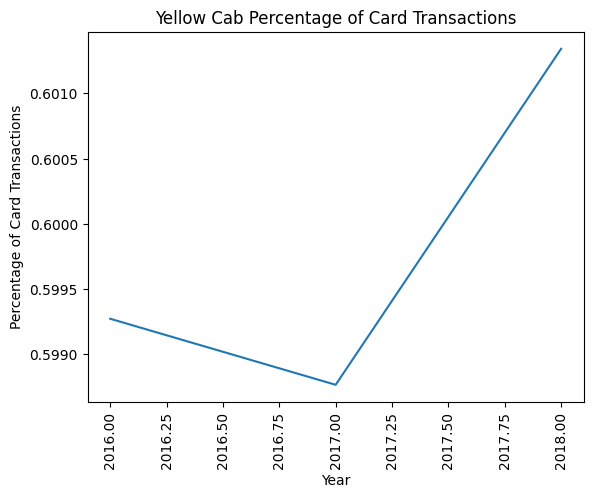

In [29]:
# Hypothesis: Customers will prefer using credit cards over cash
# Motivation: More and more people are utilizing digital currency and will contribute to most of the profits

pink_num_cash = master_data.loc[(master_data['Company'] == 'Pink Cab') & 
                                (master_data['Payment_Mode'] == 'Cash')].shape[0]

pink_num_card = master_data.loc[(master_data['Company'] == 'Pink Cab') & 
                                (master_data['Payment_Mode'] == 'Card')].shape[0]

print("Pink Cab number of cash transactions:", pink_num_cash)
print("Pink Cab number of card transactions:", pink_num_card)

pink_data = [pink_num_cash, pink_num_card]
pink_labels = ['Cash', 'Card']
plt.figure()
plt.pie(pink_data, labels=pink_labels, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Payment Method for Pink Cab')
plt.axis('equal')
plt.show()


yellow_num_cash = master_data.loc[(master_data['Company'] == 'Yellow Cab') & 
                                (master_data['Payment_Mode'] == 'Cash')].shape[0]

yellow_num_card = master_data.loc[(master_data['Company'] == 'Yellow Cab') & 
                                (master_data['Payment_Mode'] == 'Card')].shape[0]

print("Yellow Cab number of cash transactions:", yellow_num_cash)
print("Yellow Cab number of card transactions:", yellow_num_card)

yellow_data = [yellow_num_cash, yellow_num_card]
yellow_labels = ['Cash', 'Card']
plt.figure()
plt.pie(yellow_data, labels=yellow_labels, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Payment Method for Yellow Cab')
plt.axis('equal')
plt.show()



pink_cash_avg_profit = master_data.loc[(master_data['Company'] == 'Pink Cab') &
                                       (master_data['Payment_Mode'] == 'Cash'),
                                       'Profit'].mean()

pink_card_avg_profit = master_data.loc[(master_data['Company'] == 'Pink Cab') &
                                       (master_data['Payment_Mode'] == 'Card'),
                                       'Profit'].mean()

yellow_cash_avg_profit = master_data.loc[(master_data['Company'] == 'Yellow Cab') &
                                       (master_data['Payment_Mode'] == 'Cash'),
                                       'Profit'].mean()

yellow_card_avg_profit = master_data.loc[(master_data['Company'] == 'Yellow Cab') &
                                       (master_data['Payment_Mode'] == 'Card'),
                                       'Profit'].mean()

print("Pink average profit cash transaction:", pink_cash_avg_profit)
print("Pink average profit card transaction:", pink_card_avg_profit)
print("Yellow average profit cash transaction:", yellow_cash_avg_profit)
print("Yellow average profit card transaction:", yellow_card_avg_profit)
print("\n")



# Hypothesis: Number of card transactions will increase overtime 
# Motivation: This shows the trend in which customers are changing their spending behavior

pink_2016_card_num = master_data.loc[(master_data['Company'] == 'Pink Cab') & 
                                (master_data['Payment_Mode'] == 'Card') & (master_data['Year'] == 2016)].shape[0]

pink_2017_card_num = master_data.loc[(master_data['Company'] == 'Pink Cab') & 
                                (master_data['Payment_Mode'] == 'Card') & (master_data['Year'] == 2017)].shape[0]

pink_2018_card_num = master_data.loc[(master_data['Company'] == 'Pink Cab') & 
                                (master_data['Payment_Mode'] == 'Card') & (master_data['Year'] == 2018)].shape[0]


pink_2016_cash_num = master_data.loc[(master_data['Company'] == 'Pink Cab') & 
                                (master_data['Payment_Mode'] == 'Cash') & (master_data['Year'] == 2016)].shape[0]

pink_2017_cash_num = master_data.loc[(master_data['Company'] == 'Pink Cab') & 
                                (master_data['Payment_Mode'] == 'Cash') & (master_data['Year'] == 2017)].shape[0]

pink_2018_cash_num = master_data.loc[(master_data['Company'] == 'Pink Cab') & 
                                (master_data['Payment_Mode'] == 'Cash') & (master_data['Year'] == 2018)].shape[0]

print("Pink number of card transactions in 2016:", pink_2016_card_num)
print("Pink number of card transactions in 2017:", pink_2017_card_num)
print("Pink number of card transactions in 2018:", pink_2018_card_num)
print("Pink number of cash transactions in 2016:", pink_2016_cash_num)
print("Pink number of cash transactions in 2017:", pink_2017_cash_num)
print("Pink number of cash transactions in 2018:", pink_2018_cash_num)
print("\n")

yellow_2016_card_num = master_data.loc[(master_data['Company'] == 'Yellow Cab') & 
                                (master_data['Payment_Mode'] == 'Card') & (master_data['Year'] == 2016)].shape[0]

yellow_2017_card_num = master_data.loc[(master_data['Company'] == 'Yellow Cab') & 
                                (master_data['Payment_Mode'] == 'Card') & (master_data['Year'] == 2017)].shape[0]

yellow_2018_card_num = master_data.loc[(master_data['Company'] == 'Yellow Cab') & 
                                (master_data['Payment_Mode'] == 'Card') & (master_data['Year'] == 2018)].shape[0]

yellow_2016_cash_num = master_data.loc[(master_data['Company'] == 'Yellow Cab') & 
                                (master_data['Payment_Mode'] == 'Cash') & (master_data['Year'] == 2016)].shape[0]

yellow_2017_cash_num = master_data.loc[(master_data['Company'] == 'Yellow Cab') & 
                                (master_data['Payment_Mode'] == 'Cash') & (master_data['Year'] == 2017)].shape[0]

yellow_2018_cash_num = master_data.loc[(master_data['Company'] == 'Yellow Cab') & 
                                (master_data['Payment_Mode'] == 'Cash') & (master_data['Year'] == 2018)].shape[0]

print("Yellow number of card transactions in 2016:", yellow_2016_card_num)
print("Yellow number of card transactions in 2017:", yellow_2017_card_num)
print("Yellow number of card transactions in 2018:", yellow_2018_card_num)
print("Yellow number of cash transactions in 2016:", yellow_2016_cash_num)
print("Yellow number of cash transactions in 2017:", yellow_2017_cash_num)
print("Yellow number of cash transactions in 2018:", yellow_2018_cash_num)
print('\n')

pink_2016_card_ratio = pink_2016_card_num / (pink_2016_card_num + pink_2016_cash_num)
pink_2017_card_ratio = pink_2017_card_num / (pink_2017_card_num + pink_2017_cash_num)
pink_2018_card_ratio = pink_2018_card_num / (pink_2018_card_num + pink_2018_cash_num)

yellow_2016_card_ratio = yellow_2016_card_num / (yellow_2016_card_num + yellow_2016_cash_num)
yellow_2017_card_ratio = yellow_2017_card_num / (yellow_2017_card_num + yellow_2017_cash_num)
yellow_2018_card_ratio = yellow_2018_card_num / (yellow_2018_card_num + yellow_2018_cash_num)

df = pd.DataFrame({'x': [2016, 2017, 2018], 'y': [pink_2016_card_ratio, pink_2017_card_ratio, pink_2018_card_ratio]})
plt.plot(df['x'], df['y'])
plt.xlabel('Year')
plt.ylabel('Percentage of Card Transactions')
plt.title('Pink Cab Percentage of Card Transactions')
plt.xticks(rotation=90)
plt.show()

df = pd.DataFrame({'x': [2016, 2017, 2018], 'y': [yellow_2016_card_ratio, yellow_2017_card_ratio, yellow_2018_card_ratio]})
plt.plot(df['x'], df['y'])
plt.xlabel('Year')
plt.ylabel('Percentage of Card Transactions')
plt.title('Yellow Cab Percentage of Card Transactions')
plt.xticks(rotation=90)
plt.show()


Retained Customers:
 Company
Pink Cab       5775
Yellow Cab    15883
Name: Year, dtype: int64

Lost Customers:
 Company
Pink Cab      26555
Yellow Cab    24013
Name: Year, dtype: int64


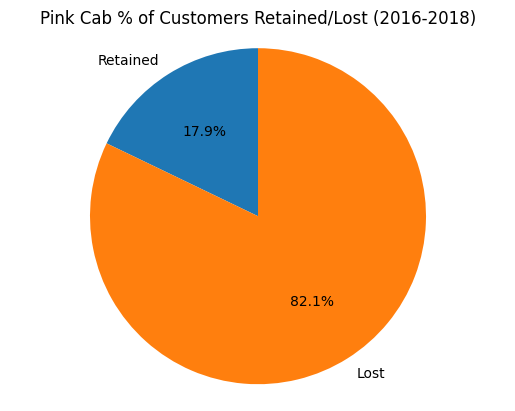

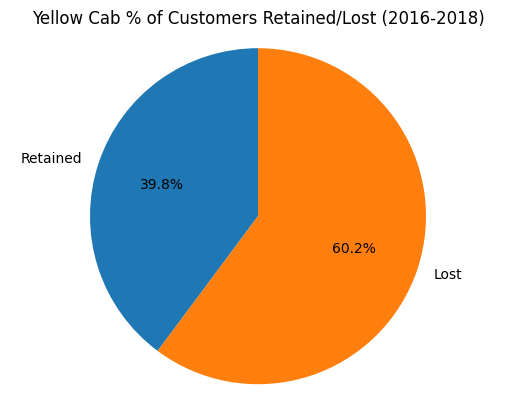

Average number of times a Customer called a Pink Cab in 2016: 1.4256908140403286
Average number of times a Customer called a Pink Cab in 2017: 1.607805884268809
Average number of times a Customer called a Pink Cab in 2018: 1.6921282509430216
Average number of times a Customer called a Yellow Cab in 2016: 2.8874238089314592
Average number of times a Customer called a Yellow Cab in 2017: 3.4912522186402
Average number of times a Customer called a Yellow Cab in 2018: 3.742835491871039


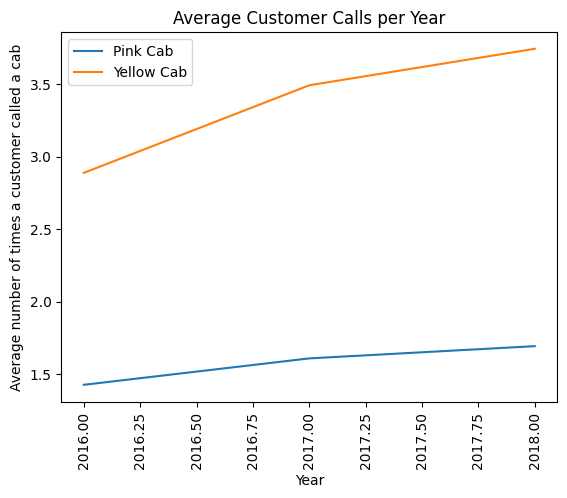

In [39]:
# Hypothesis: Yellow Cab will retain higher % of customers between 2016 and 2018

retained_customers = master_data.groupby(['Company', 'Customer ID'])['Year'].nunique()
retained_counts = retained_customers.groupby('Company').apply(lambda x: sum(x == 3))
lost_counts = retained_customers.groupby('Company').apply(lambda x: sum(x < 3))

print("Retained Customers:\n", retained_counts)
print("\nLost Customers:\n", lost_counts)


pink_data = [5775, 26555]
pink_labels = ['Retained', 'Lost']
plt.figure()
plt.pie(pink_data, labels=pink_labels, autopct='%1.1f%%', startangle=90)
plt.title('Pink Cab % of Customers Retained/Lost (2016-2018)')
plt.axis('equal')
plt.show()

yellow_data = [15883, 24013]
yellow_labels = ['Retained', 'Lost']
plt.figure()
plt.pie(yellow_data, labels=yellow_labels, autopct='%1.1f%%', startangle=90)
plt.title('Yellow Cab % of Customers Retained/Lost ')
plt.axis('equal')
plt.show()



# Hypothesis: Yellow Cab will have a higher increase in average number of transactions with the same customers

pink_cab_2016 = master_data[(master_data['Company'] == 'Pink Cab') & (master_data['Year'] == 2016)]
pink_customer_counts_2016 = pink_cab_2016.groupby('Customer ID')['Customer ID'].count().mean()

pink_cab_2017 = master_data[(master_data['Company'] == 'Pink Cab') & (master_data['Year'] == 2017)]
pink_customer_counts_2017 = pink_cab_2017.groupby('Customer ID')['Customer ID'].count().mean()

pink_cab_2018 = master_data[(master_data['Company'] == 'Pink Cab') & (master_data['Year'] == 2018)]
pink_customer_counts_2018 = pink_cab_2018.groupby('Customer ID')['Customer ID'].count().mean()


print("Average number of times a Customer called a Pink Cab in 2016:", pink_customer_counts_2016)
print("Average number of times a Customer called a Pink Cab in 2017:", pink_customer_counts_2017)
print("Average number of times a Customer called a Pink Cab in 2018:", pink_customer_counts_2018)



yellow_cab_2016 = master_data[(master_data['Company'] == 'Yellow Cab') & (master_data['Year'] == 2016)]
yellow_customer_counts_2016 = yellow_cab_2016.groupby('Customer ID')['Customer ID'].count().mean()

yellow_cab_2017 = master_data[(master_data['Company'] == 'Yellow Cab') & (master_data['Year'] == 2017)]
yellow_customer_counts_2017 = yellow_cab_2017.groupby('Customer ID')['Customer ID'].count().mean()

yellow_cab_2018 = master_data[(master_data['Company'] == 'Yellow Cab') & (master_data['Year'] == 2018)]
yellow_customer_counts_2018 = yellow_cab_2018.groupby('Customer ID')['Customer ID'].count().mean()


print("Average number of times a Customer called a Yellow Cab in 2016:", yellow_customer_counts_2016)
print("Average number of times a Customer called a Yellow Cab in 2017:", yellow_customer_counts_2017)
print("Average number of times a Customer called a Yellow Cab in 2018:", yellow_customer_counts_2018)

pink_customer_counts = [pink_customer_counts_2016, pink_customer_counts_2017, pink_customer_counts_2018]
yellow_customer_counts = [yellow_customer_counts_2016, yellow_customer_counts_2017, yellow_customer_counts_2018]

years = [2016, 2017, 2018]
plt.plot(years, pink_customer_counts, label='Pink Cab')
plt.plot(years, yellow_customer_counts, label='Yellow Cab')
plt.xlabel('Year')
plt.ylabel('Average number of times a customer called a cab')
plt.title('Average Customer Calls per Year')
plt.legend()
plt.xticks(rotation=90)
plt.show()